In [1]:
import pandas as pd # Tabular data
import numpy as np # Numerical operations
import geopandas as gpd # Vector geospatial operations
import contextily as ctx # Used for contextual basemaps
import matplotlib.pyplot as plt # Plotting
import seaborn # Plotting
seaborn.set()
import folium # Interactive maps
import os # File system operations
import zipfile # ZIP file operations
from glob import glob # Recursive file lookup
from unidecode import unidecode # Remove macrons
from tqdm.auto import tqdm # progress bars
tqdm.pandas()
plt.rcParams['figure.figsize'] = (20, 20) # Large plots by default

In [2]:
glob("input/**/*", recursive=True)

['input/subnational-population-projections-2018base-2048.xlsx',
 'input/statsnzterritorial-authority-local-board-2021-clipped-generalised-FGDB.zip',
 'input/hospital_discharges',
 'input/statsnzdistrict-health-board-2015-FGDB.zip',
 'input/NZ_Public_Hospitals.geojson',
 'input/hospital_discharges/pubfund2016_17data.zip',
 'input/hospital_discharges/pubfund2015_16data.zip',
 'input/hospital_discharges/publicly-funded-discharges-2013-14-data.zip',
 'input/hospital_discharges/publicly-funded-discharges-2014-15-data.zip',
 'input/hospital_discharges/publicly-funded-hospital-data-2017-2018.zip',
 'input/hospital_discharges/publicly-funded-hospital-data-2018-2019.zip']

In [3]:
DHB = gpd.read_file("input/statsnzdistrict-health-board-2015-FGDB.zip!district-health-board-2015.gdb")
DHB = DHB[DHB.DHB2015_Name != "Area outside District Health Board"]
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143..."
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336..."
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921..."
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708..."
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573..."
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889..."
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819..."
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391..."
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876..."
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412..."


In [4]:
hosp = gpd.read_file("input/NZ_Public_Hospitals.geojson")
hosp

,Premises_Name,Certification_Service_Type,Service_Types,Total_Beds,Premises_Website,Premises_Address_Other,Premises_Address,Premises_Address_Suburb_Road,Premises_Address_Town_City,Premises_Address_Post_Code,...,Legal_Entity_Address_Suburb_Roa,Legal_Entity_Address_Town_City,Legal_Entity_Address_Post_Code,Legal_Entity_Postal_Address,Legal_Entity_Postal_Address_Sub,Legal_Entity_Postal_Address_Tow,Legal_Entity_Postal_Address_Pos,Legal_Entity_Website,ObjectId,geometry
0,Auckland City Hospital,Public Hospital,"Childrens health, Maternity, Surgical, Medical",1124,None,None,2 Park Road,Grafton,Auckland,1023,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,1,POINT (174.76948 -36.86089)
1,Auckland DHB X 3 Units - Mental Health,Public Hospital,Mental health,96,None,None,2 Park Road,Grafton,Auckland,1023,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,2,POINT (174.76948 -36.86089)
2,Buchanan Rehabilitation Centre,Public Hospital,Mental health,40,None,None,27 Sutherland Road,Point Chevalier,Auckland,1025,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,3,POINT (174.71239 -36.87277)
3,Greenlane Clinical Centre,Public Hospital,"Surgical, Medical",31,None,None,214 Green Lane West,Epsom,Auckland,1051,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,4,POINT (174.77965 -36.89332)
4,Opotiki Health Care Centre,Public Hospital,"Maternity, Surgical, Medical",6,None,None,32A King Street,None,Opotiki,3122,...,None,Tauranga,3112,Private Bag 12024,None,Tauranga,3143,None,5,POINT (177.28553 -38.00635)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Waitakere Hospital,Public Hospital,"Geriatric, Childrens health, Surgical, Mental ...",283,None,None,55 Lincoln Road,Henderson,Auckland,0610,...,None,Auckland,622,PO Box 93503,None,Auckland,740,None,79,POINT (174.62866 -36.86952)
79,Wilson Centre,Public Hospital,"Physical, Childrens health",26,None,None,1 St Leonards Road,Hauraki,Auckland,0622,...,None,Auckland,622,PO Box 93503,None,Auckland,740,None,80,POINT (174.78800 -36.79983)
80,Buller Health,Public Hospital,"Maternity, Medical",8,None,None,45 Derby Street,None,Westport,7825,...,None,Greymouth,7805,PO Box 387,None,Greymouth 7840,7840,None,81,POINT (171.60491 -41.74922)
81,Grey Base Hospital,Public Hospital,"Dementia care, Geriatric, Mental health, Child...",114,None,None,71 Water Walk Road,None,Greymouth,7805,...,None,Greymouth,7805,PO Box 387,None,Greymouth 7840,7840,None,82,POINT (171.19210 -42.46327)


In [5]:
TALB = gpd.read_file("input/statsnzterritorial-authority-local-board-2021-clipped-generalised-FGDB.zip!territorial-authority-local-board-2021-clipped-generalised.gdb")
TALB = TALB[TALB.TALB2021_V1_00_NAME_ASCII != "Area Outside Territorial Authority"]
TALB

,TALB2021_V1_00,TALB2021_V1_00_NAME,TALB2021_V1_00_NAME_ASCII,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry
0,00100,Far North District,Far North District,6686.751655,6699.099475,2.167299e+06,"MULTIPOLYGON (((1643927.274 6083897.824, 16439..."
1,00200,Whangarei District,Whangarei District,2712.118612,2712.118612,9.223848e+05,"MULTIPOLYGON (((1752996.594 6015585.829, 17530..."
2,00300,Kaipara District,Kaipara District,3108.960347,3108.960347,9.341178e+05,"MULTIPOLYGON (((1714357.617 5983211.997, 17143..."
3,01100,Thames-Coromandel District,Thames-Coromandel District,2207.766906,2207.766906,8.204000e+05,"MULTIPOLYGON (((1857357.606 5876615.882, 18573..."
4,01200,Hauraki District,Hauraki District,1270.133527,1270.133527,3.112825e+05,"MULTIPOLYGON (((1824948.875 5883405.558, 18249..."
...,...,...,...,...,...,...,...
82,07617,Māngere-Ōtāhuhu Local Board Area,Mangere-Otahuhu Local Board Area,52.478523,52.478523,1.097939e+05,"MULTIPOLYGON (((1758426.203 5908461.836, 17584..."
83,07618,Ōtara-Papatoetoe Local Board Area,Otara-Papatoetoe Local Board Area,37.110464,37.110464,6.770070e+04,"MULTIPOLYGON (((1765765.640 5909501.655, 17657..."
84,07619,Manurewa Local Board Area,Manurewa Local Board Area,37.110528,37.110528,4.641286e+04,"MULTIPOLYGON (((1769432.488 5904664.673, 17694..."
85,07620,Papakura Local Board Area,Papakura Local Board Area,40.216977,40.216977,6.140098e+04,"MULTIPOLYGON (((1772419.010 5901843.751, 17725..."


In [6]:
# From https://www.stats.govt.nz/information-releases/subnational-population-projections-2018base2048#map
pop = pd.concat(pd.read_excel(
    "input/subnational-population-projections-2018base-2048.xlsx",
    sheet_name=["Table 5", "Table 6"],
    skiprows=5,
    usecols="A,B,G",
    names=["area", "year", "population"],
    #nrows=231,
    engine='openpyxl'
))
# Drop notes
pop.dropna(subset=["year"], inplace=True)
# Fill area forward
pop.area.fillna(method="ffill", inplace=True)
pop.reset_index(inplace=True)
pop.area.replace("Maungakiekie-Tamaki local board area", "Maungakiekie-Tāmaki local board area", inplace=True)
pop.area.replace("Great Barrier local board area", "Aotea/Great Barrier local board area", inplace=True)
# Fix up dtypes
pop.population = pop.population.astype(int)
pop.year = pop.year.astype(int).astype(str)
pop

,level_0,level_1,area,year,population
0,Table 5,0,Far North district,1996,54500
1,Table 5,1,Far North district,2001,56400
2,Table 5,2,Far North district,2006,57500
3,Table 5,3,Far North district,2013,60600
4,Table 5,4,Far North district,2018,67900
...,...,...,...,...,...
963,Table 6,226,Franklin local board area,2028,96900
964,Table 6,227,Franklin local board area,2033,109400
965,Table 6,228,Franklin local board area,2038,122000
966,Table 6,229,Franklin local board area,2043,134500


<AxesSubplot:xlabel='year'>

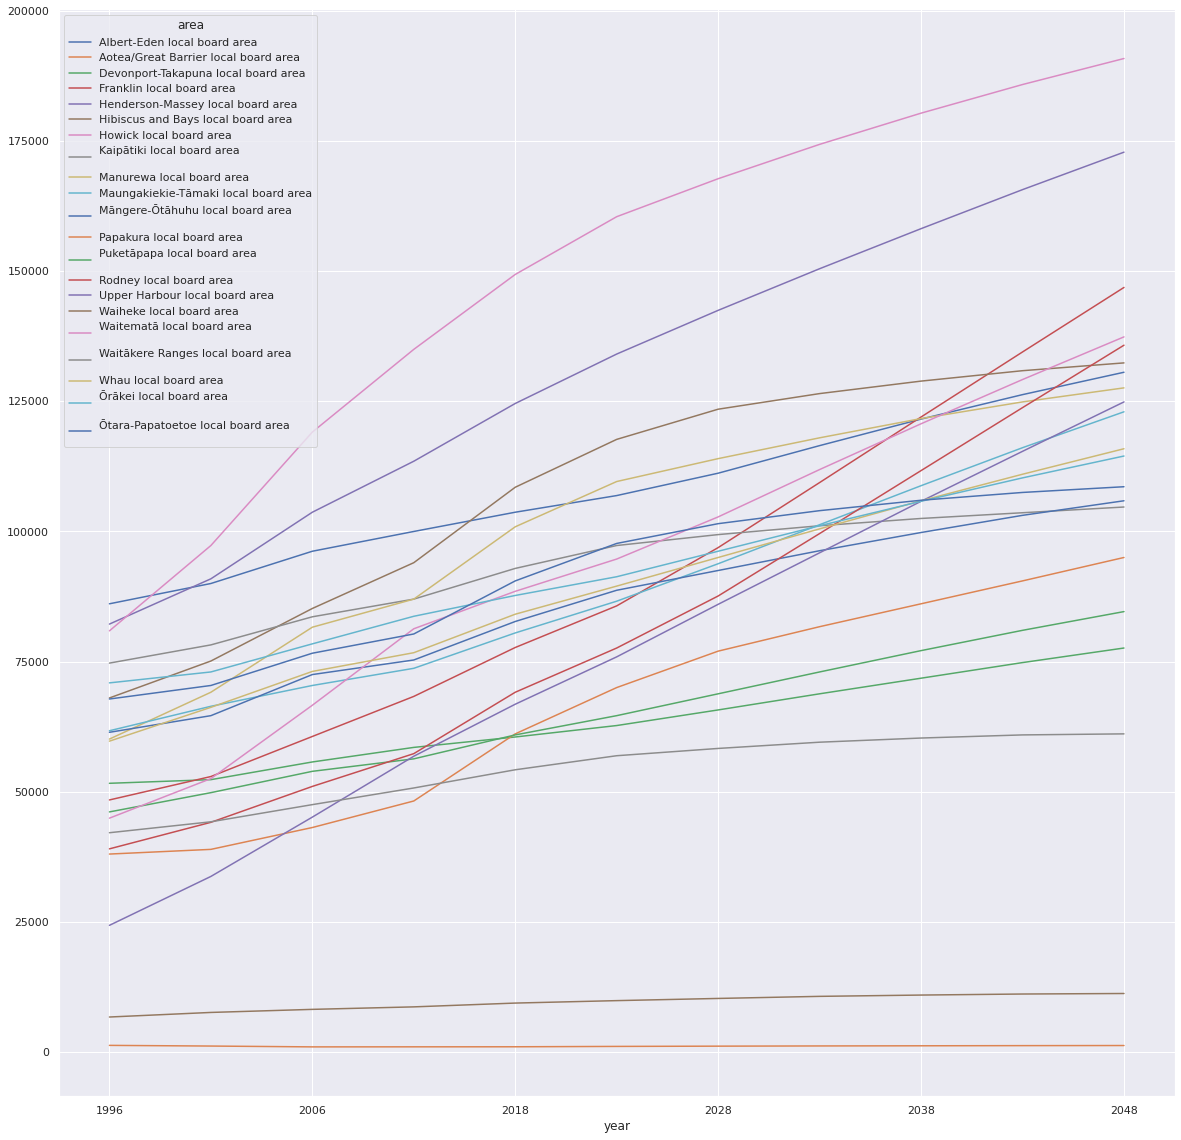

In [7]:
pop[pop.area.str.contains("local")].pivot(index='year', columns='area', values='population').plot()

In [8]:
pop = pop.pivot(index='area', columns='year', values='population')
pop

year,1996,2001,2006,2013,2018,2023,2028,2033,2038,2043,2048
area,,,,,,,,,,,
Albert-Eden local board area,86100,90000,96200,100000,103700,106900,111200,116500,121600,126300,130600
Aotea/Great Barrier local board area,1230,1100,940,950,960,1030,1080,1120,1150,1180,1200
Ashburton district,25700,26000,28000,32300,34600,36200,37500,38700,39900,40900,41900
Auckland,1115800,1218300,1373000,1493200,1654800,1778700,1891800,2001800,2107000,2207800,2302900
Buller district,10750,9860,9940,10650,9850,9550,9510,9410,9240,9010,8720
...,...,...,...,...,...,...,...,...,...,...,...
Whau local board area,59700,66200,73100,76700,84100,89500,95000,100500,105900,111000,115900
Ōpōtiki district\n,9620,9490,9200,8780,9670,10250,10350,10400,10300,10150,9910
Ōrākei local board area\n,70900,73000,78400,83700,87700,91300,96200,101100,105800,110300,114500


In [9]:
cols = pop.columns.tolist()
cols

['1996',
 '2001',
 '2006',
 '2013',
 '2018',
 '2023',
 '2028',
 '2033',
 '2038',
 '2043',
 '2048']

In [10]:
pop.index

Index(['Albert-Eden local board area', 'Aotea/Great Barrier local board area',
       'Ashburton district', 'Auckland', 'Buller district',
       'Carterton district', 'Central Hawke's Bay district',
       'Central Otago district', 'Chatham Islands territory',
       'Christchurch city', 'Clutha district',
       'Devonport-Takapuna local board area', 'Dunedin city',
       'Far North district', 'Franklin local board area', 'Gisborne district',
       'Gore district', 'Grey district', 'Hamilton city', 'Hastings district',
       'Hauraki district', 'Henderson-Massey local board area',
       'Hibiscus and Bays local board area', 'Horowhenua district',
       'Howick local board area', 'Hurunui district', 'Invercargill city',
       'Kaikoura district', 'Kaipara district', 'Kaipātiki local board area\n',
       'Kapiti Coast district', 'Kawerau district', 'Lower Hutt city',
       'Mackenzie district', 'Manawatū district\n',
       'Manurewa local board area', 'Marlborough district',
 

In [11]:
def normalise(string):
    return unidecode(string.lower().strip())
pop = pd.merge(TALB,
               pop,
               left_on=TALB.TALB2021_V1_00_NAME.apply(normalise),
               right_on=pop.index.map(normalise),
               how="left")
pop[["TALB2021_V1_00_NAME"] + cols]

,TALB2021_V1_00_NAME,1996,2001,2006,2013,2018,2023,2028,2033,2038,2043,2048
0,Far North District,54500,56400,57500,60600,67900,72400,75000,77300,79100,80600,81700
1,Whangarei District,68400,70000,76500,83700,94100,101000,105500,109500,113100,116400,119300
2,Kaipara District,17800,17950,18550,20500,23700,25900,27200,28300,29100,29800,30300
3,Thames-Coromandel District,25400,25800,26700,27300,30700,32400,33100,33500,33500,33300,32800
4,Hauraki District,18550,18000,18300,18600,20700,21800,22200,22400,22300,22100,21800
...,...,...,...,...,...,...,...,...,...,...,...,...
82,Māngere-Ōtāhuhu Local Board Area,61400,64600,72500,75300,82700,88700,92500,96300,99800,103100,105900
83,Ōtara-Papatoetoe Local Board Area,67800,70400,76600,80300,90500,97700,101500,104000,106000,107500,108600
84,Manurewa Local Board Area,60100,69100,81600,87000,100900,109600,114000,118000,121700,124900,127600
85,Papakura Local Board Area,38000,38900,43100,48200,61100,70000,77000,81700,86100,90500,95000


In [12]:
assert all(~pop.isna())

<AxesSubplot:>

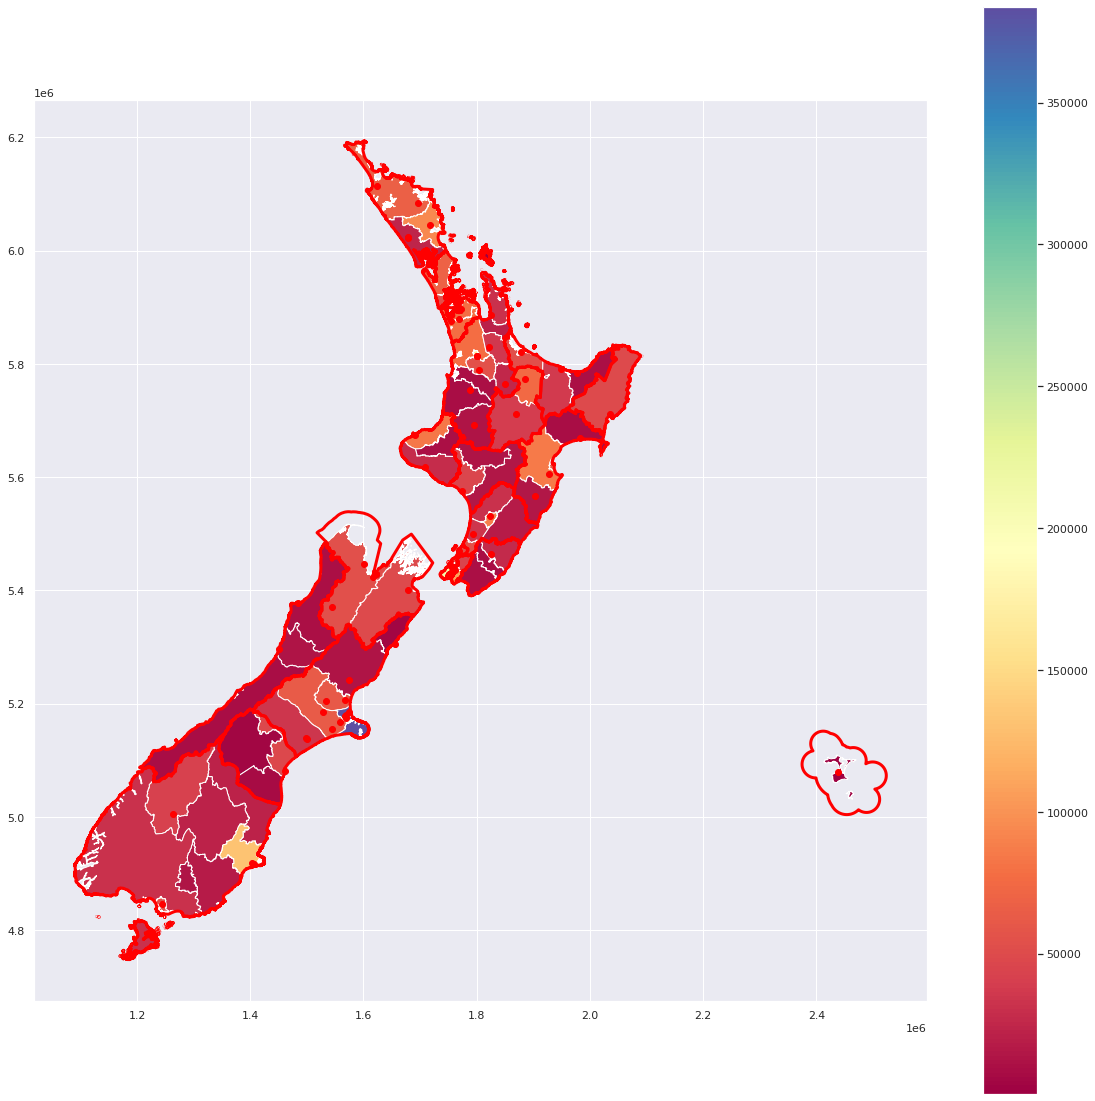

In [13]:
ax = pop.plot(column="2018", cmap="Spectral", legend=True)
DHB.boundary.plot(ax=ax, color="red", linewidth=3)
hosp.to_crs(DHB.crs).plot(ax=ax, color="red")

[1704081.5934     5838535.95349979 1806275.24620008 6001802.16870022]


(5838535.953499794, 6001802.168700218)

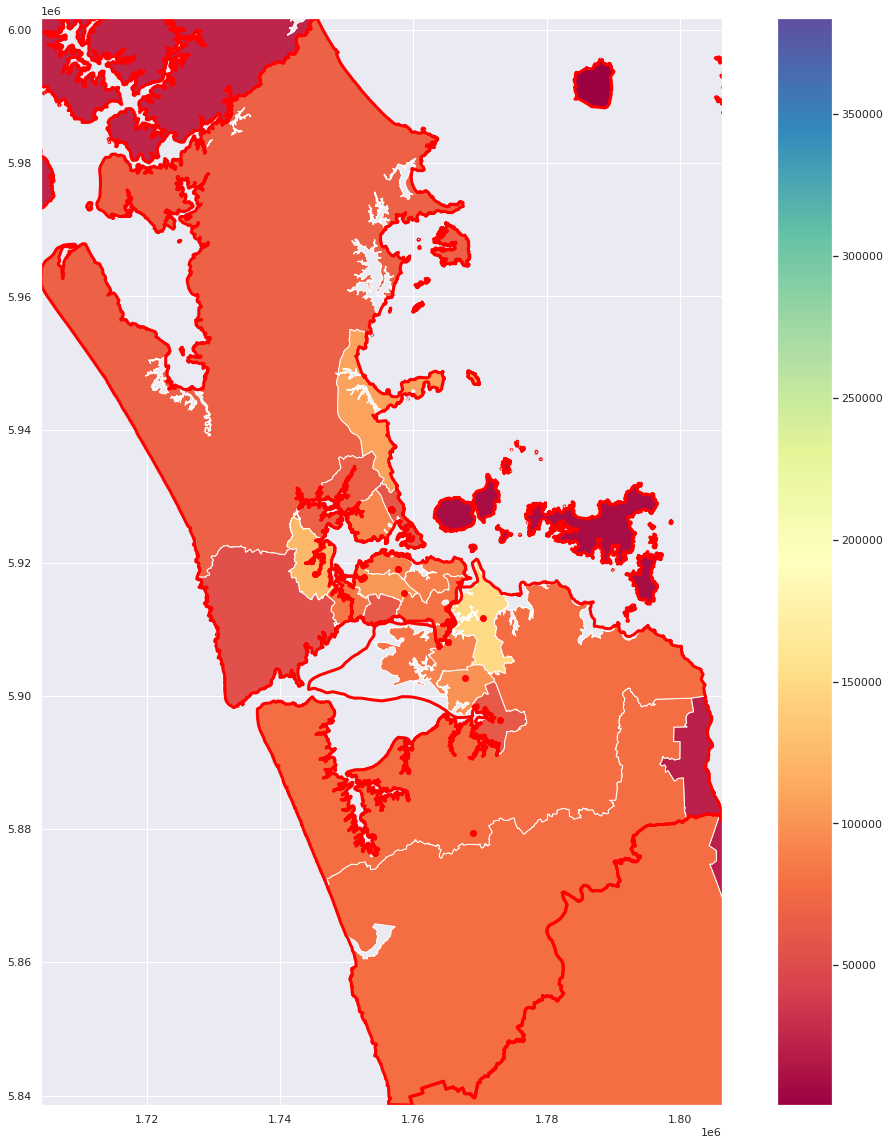

In [14]:
AKL_bounds = DHB[DHB.DHB2015_Name.isin(["Counties Manukau", "Waitemata"])].total_bounds
print(AKL_bounds)
ax = pop.plot(column="2018", cmap="Spectral", legend=True)
DHB.boundary.plot(ax=ax, color="red", linewidth=3)
hosp.to_crs(DHB.crs).plot(ax=ax, color="red")
ax.set_xlim(AKL_bounds[0], AKL_bounds[2])
ax.set_ylim(AKL_bounds[1], AKL_bounds[3])

In [15]:
DHB["touched_TALBs"] = DHB.geometry.progress_apply(
    lambda poly: ",".join(
        TALB.TALB2021_V1_00_NAME[TALB.representative_point().intersects(poly)]
    )
)
with pd.option_context('display.max_colwidth', None):
    display(DHB[["DHB2015_Name", "touched_TALBs"]])

  0%|          | 0/20 [00:00<?, ?it/s]

,DHB2015_Name,touched_TALBs
0,Northland,"Far North District,Whangarei District,Kaipara District"
1,Waitemata,"Rodney Local Board Area,Hibiscus and Bays Local Board Area,Upper Harbour Local Board Area,Kaipātiki Local Board Area,Devonport-Takapuna Local Board Area,Henderson-Massey Local Board Area,Waitākere Ranges Local Board Area"
2,Auckland,"Aotea/Great Barrier Local Board Area,Waiheke Local Board Area,Waitematā Local Board Area,Whau Local Board Area,Albert-Eden Local Board Area,Puketāpapa Local Board Area,Ōrākei Local Board Area,Maungakiekie-Tāmaki Local Board Area"
3,Counties Manukau,"Howick Local Board Area,Māngere-Ōtāhuhu Local Board Area,Ōtara-Papatoetoe Local Board Area,Manurewa Local Board Area,Papakura Local Board Area,Franklin Local Board Area"
4,Waikato,"Thames-Coromandel District,Hauraki District,Waikato District,Matamata-Piako District,Hamilton City,Waipa District,Ōtorohanga District,South Waikato District,Waitomo District,Ruapehu District"
5,Lakes,"Taupo District,Rotorua District"
6,Bay of Plenty,"Western Bay of Plenty District,Tauranga City,Whakatane District,Kawerau District,Ōpōtiki District"
7,Tairawhiti,Gisborne District
8,Taranaki,"New Plymouth District,Stratford District,South Taranaki District"
9,Hawke's Bay,"Wairoa District,Hastings District,Napier City,Central Hawke's Bay District"


In [16]:
pop

,key_0,TALB2021_V1_00,TALB2021_V1_00_NAME,TALB2021_V1_00_NAME_ASCII,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,1996,2001,2006,2013,2018,2023,2028,2033,2038,2043,2048
0,far north district,00100,Far North District,Far North District,6686.751655,6699.099475,2.167299e+06,"MULTIPOLYGON (((1643927.274 6083897.824, 16439...",54500,56400,57500,60600,67900,72400,75000,77300,79100,80600,81700
1,whangarei district,00200,Whangarei District,Whangarei District,2712.118612,2712.118612,9.223848e+05,"MULTIPOLYGON (((1752996.594 6015585.829, 17530...",68400,70000,76500,83700,94100,101000,105500,109500,113100,116400,119300
2,kaipara district,00300,Kaipara District,Kaipara District,3108.960347,3108.960347,9.341178e+05,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...",17800,17950,18550,20500,23700,25900,27200,28300,29100,29800,30300
3,thames-coromandel district,01100,Thames-Coromandel District,Thames-Coromandel District,2207.766906,2207.766906,8.204000e+05,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...",25400,25800,26700,27300,30700,32400,33100,33500,33500,33300,32800
4,hauraki district,01200,Hauraki District,Hauraki District,1270.133527,1270.133527,3.112825e+05,"MULTIPOLYGON (((1824948.875 5883405.558, 18249...",18550,18000,18300,18600,20700,21800,22200,22400,22300,22100,21800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,mangere-otahuhu local board area,07617,Māngere-Ōtāhuhu Local Board Area,Mangere-Otahuhu Local Board Area,52.478523,52.478523,1.097939e+05,"MULTIPOLYGON (((1758426.203 5908461.836, 17584...",61400,64600,72500,75300,82700,88700,92500,96300,99800,103100,105900
83,otara-papatoetoe local board area,07618,Ōtara-Papatoetoe Local Board Area,Otara-Papatoetoe Local Board Area,37.110464,37.110464,6.770070e+04,"MULTIPOLYGON (((1765765.640 5909501.655, 17657...",67800,70400,76600,80300,90500,97700,101500,104000,106000,107500,108600
84,manurewa local board area,07619,Manurewa Local Board Area,Manurewa Local Board Area,37.110528,37.110528,4.641286e+04,"MULTIPOLYGON (((1769432.488 5904664.673, 17694...",60100,69100,81600,87000,100900,109600,114000,118000,121700,124900,127600
85,papakura local board area,07620,Papakura Local Board Area,Papakura Local Board Area,40.216977,40.216977,6.140098e+04,"MULTIPOLYGON (((1772419.010 5901843.751, 17725...",38000,38900,43100,48200,61100,70000,77000,81700,86100,90500,95000


In [17]:
def get_DHB_pop(poly):
    return pop.loc[pop.representative_point().intersects(poly), cols].sum()
result = DHB.geometry.progress_apply(get_DHB_pop)
result.columns = result.columns.map(lambda c: f"pop_{c}")
DHB = pd.concat([DHB, result], axis='columns')
DHB

  0%|          | 0/20 [00:00<?, ?it/s]

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,touched_TALBs,pop_1996,pop_2001,pop_2006,pop_2013,pop_2018,pop_2023,pop_2028,pop_2033,pop_2038,pop_2043,pop_2048
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",140700,144350,152550,164800,185700,199300,207700,215100,221300,226800,231300
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",381900,418500,471800,517800,576600,622200,663000,701900,739200,775100,809400
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",377310,406560,447690,481280,515720,544460,579130,616070,651950,686180,718400
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",356600,393200,453500,494100,562300,612200,649700,683800,716000,746400,774900
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",341210,347570,370440,398780,446180,479240,502980,524820,544490,562780,579220
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",98200,99400,101500,103200,113400,119800,122700,125000,126700,127800,128600
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",167440,183380,200750,214930,249630,271960,284850,296220,306270,315410,323630
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,47200,45500,45900,47000,49500,51900,53100,54000,54600,55000,55200
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",109250,105910,107420,113810,121310,126850,130350,133200,135350,137150,138400
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",146550,147260,151970,157850,172270,181690,187400,192300,196190,199530,201960


Text(0.5, 1.0, 'Population by DHB in 2018')

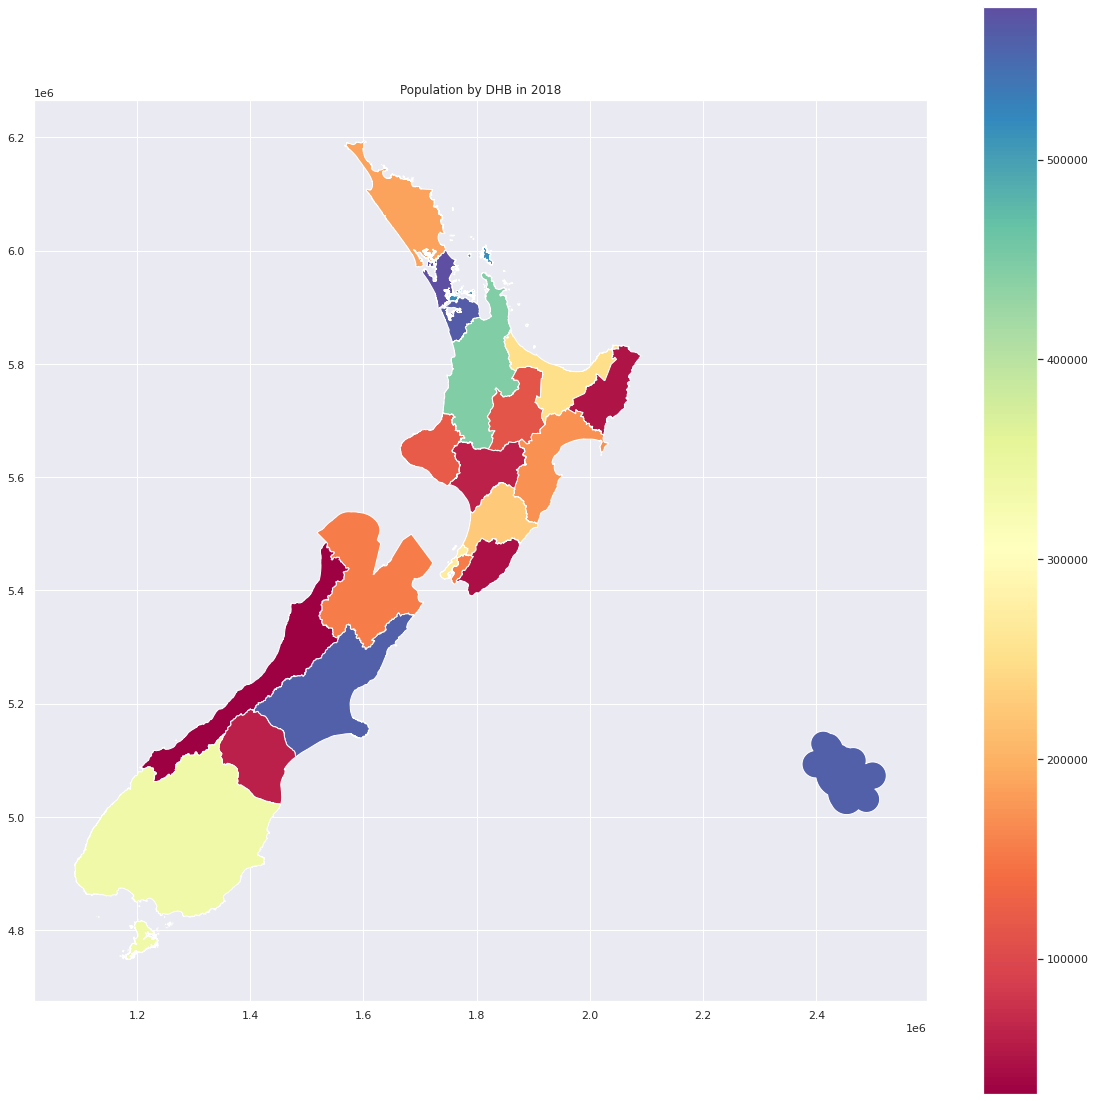

In [18]:
ax = DHB.plot(column="pop_2018", legend=True, cmap="Spectral")
ax.set_title("Population by DHB in 2018")

In [19]:
discharges = []
for f in glob("input/hospital_discharges/*"):
    zf = zipfile.ZipFile(f)
    print(f)
    try:
        df = pd.read_csv(zf.open('PubFund_DischargesAll.txt'), delimiter='|', encoding='Windows-1252')
    except KeyError:
        df = pd.read_csv(zf.open('PubFund_Data/PubFund_DischargesAll.txt'), delimiter='|', encoding='Windows-1252')
    df.DHB.replace("Midcentral", "MidCentral", inplace=True)
    discharges.append(df)
discharges = pd.concat(discharges)
discharges

input/hospital_discharges/pubfund2016_17data.zip
input/hospital_discharges/pubfund2015_16data.zip
input/hospital_discharges/publicly-funded-discharges-2013-14-data.zip
input/hospital_discharges/publicly-funded-discharges-2014-15-data.zip
input/hospital_discharges/publicly-funded-hospital-data-2017-2018.zip
input/hospital_discharges/publicly-funded-hospital-data-2018-2019.zip


,FinancialYear,DHB,EthnicGroup,Sex,AgeGroup,ICDCode,ICDThreeChar,ICDSubgroup,ICDChapter,Discharges,ICDThreeCharCode
0,2016/17,Counties Manukau,Pacific,Male,65-69,A00,A00 Cholera,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
1,2016/17,Auckland,Maori,Female,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
2,2016/17,Auckland,Other,Female,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
3,2016/17,Counties Manukau,Pacific,Female,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
4,2016/17,Auckland,Maori,Male,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
409504,20182019,Wairarapa,Other,Male,55-59,Z80,Z80 Family history of malignant neoplasm,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN
409505,20182019,Waikato,Other,Male,60-64,Z80,Z80 Family history of malignant neoplasm,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN
409506,20182019,Northland,Maori,Female,00-04,Z82,Z82 Family history of certain disabilities and...,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN
409507,20182019,Northland,Maori,Male,25-29,Z84,Z84 Family history of other conditions,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN


In [20]:
with pd.option_context('display.max_colwidth', None):
    display(discharges.sort_values(by="Discharges", ascending=False).head(10))

,FinancialYear,DHB,EthnicGroup,Sex,AgeGroup,ICDCode,ICDThreeChar,ICDSubgroup,ICDChapter,Discharges,ICDThreeCharCode
344935,2014/15,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2148,NaN
354531,2016/17,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2099,NaN
345001,2014/15,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2086,NaN
364182,2017/18,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2067,NaN
354593,2016/17,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2034,NaN
339132,2013/14,Waitemata,Other,Male,00-04,NaN,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Z00–Z99 Factors influencing health status and contact with health services,2030,Z38
339066,2013/14,Waitemata,Other,Female,00-04,NaN,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Z00–Z99 Factors influencing health status and contact with health services,2025,Z38
349182,2015/16,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,1991,NaN
364244,2017/18,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,1982,NaN
349244,2015/16,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,1933,NaN


In [21]:
discharges.groupby("DHB")["Discharges"].sum()

DHB
Auckland              638673
Bay of Plenty         388231
Canterbury            737913
Capital and Coast     393409
Counties Manukau      786348
Hawke's Bay           266436
Hutt Valley           238268
Lakes                 181994
MidCentral            258823
Nelson Marlborough    204635
Northland             305592
South Canterbury       99051
Southern              469828
Tairawhiti             75723
Taranaki              211696
Unknown                34050
Waikato               686812
Wairarapa              74094
Waitemata             924552
West Coast             56462
Whanganui             119105
Name: Discharges, dtype: int64

In [22]:
discharges["ICDChapter"].value_counts()

Chapter 19 Injury, poisoning and certain other consequences external causes                                    416478
Chapter 11 Diseases of the digestive system                                                                    169049
Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified             154515
Chapter 13 Diseases of the musculoskeletal system and connective tissue                                        120886
Chapter 10 Diseases of the respiratory system                                                                  119889
Chapter  9 Diseases of the circulatory system                                                                  105939
Chapter 14 Diseases of the genitourinary system                                                                101217
Chapter  2 Neoplasms                                                                                            97348
Chapter 21 Factors influencing health status and contact

In [23]:
discharges["ICDSubgroup"].value_counts().head(20)

S00–S09 Injuries to the head                                                            90762
Z40–Z54 Persons encountering health services for specific procedures and health care    63054
S60–S69 Injuries to the wrist and hand                                                  57905
I30–I52 Other forms of heart disease                                                    45265
R50–R69 General symptoms and signs                                                      44658
S80–S89 Injuries to the knee and lower leg                                              42575
J09–J18 Influenza and pneumonia                                                         37131
L00–L08 Infections of the skin and subcutaneous tissue                                  34612
T80–T88 Complications of surgical and medical care, not elsewhere classified            34321
R00–R09 Symptoms and signs involving the circulatory and respiratory systems            32782
K55–K64 Other diseases of intestines                        

In [24]:
discharges["ICDThreeChar"].value_counts().head(20)

S06 Intracranial injury                                29367
Z50 Care involving use of rehabilitation procedures    27225
S82 Fracture of lower leg, including ankle             26338
S52 Fracture of forearm                                23616
L03 Cellulitis                                         23534
S62 Fracture at wrist and hand level                   19440
S01 Open wound of head                                 18676
J18 Pneumonia, organism unspecified                    16995
S42 Fracture of shoulder and upper arm                 16777
S09 Other and unspecified injuries of head             15398
R55 Syncope and collapse                               15338
S61 Open wound of wrist and hand                       14453
R10 Abdominal and pelvic pain                          14000
R07 Pain in throat and chest                           13648
S02 Fracture of skull and facial bones                 12906
N39 Other disorders of urinary system                  12753
I21 Acute myocardial inf

In [25]:
discharges.FinancialYear.value_counts()

20182019    409509
2017/18     377960
2016/17     368295
2015/16     362851
2014/15     358697
2013/14     352666
Name: FinancialYear, dtype: int64

In [26]:
discharges["year"] = discharges.FinancialYear.str.slice(stop=4)
discharges.year.value_counts()

2017    377960
2016    368295
2015    362851
2014    358697
2013    352666
Name: year, dtype: int64

In [27]:
discharges_by_year_and_DHB = discharges.groupby(["year", "DHB"])["Discharges"].sum()
discharges_by_year_and_DHB = discharges_by_year_and_DHB.reset_index()
discharges_by_year_and_DHB

,year,DHB,Discharges
0,2013,Auckland,102802
1,2013,Bay of Plenty,57981
2,2013,Canterbury,118038
3,2013,Capital and Coast,63652
4,2013,Counties Manukau,130337
...,...,...,...
100,2017,Waikato,120225
101,2017,Wairarapa,13974
102,2017,Waitemata,159515
103,2017,West Coast,9809


In [28]:
discharges_by_year_and_DHB = discharges_by_year_and_DHB.pivot(index='DHB', columns='year', values='Discharges')
discharges_by_year_and_DHB

year,2013,2014,2015,2016,2017
DHB,,,,,
Auckland,102802,104105,106314,107989,108564
Bay of Plenty,57981,61857,64102,66935,68021
Canterbury,118038,119195,121063,124765,126842
Capital and Coast,63652,64684,65970,64888,66836
Counties Manukau,130337,132900,129908,130505,131435
Hawke's Bay,40552,41929,43775,45218,46282
Hutt Valley,37451,37785,39304,40212,41056
Lakes,28491,29369,30449,31060,31145
MidCentral,41207,42184,44395,43415,43058


<AxesSubplot:xlabel='year'>

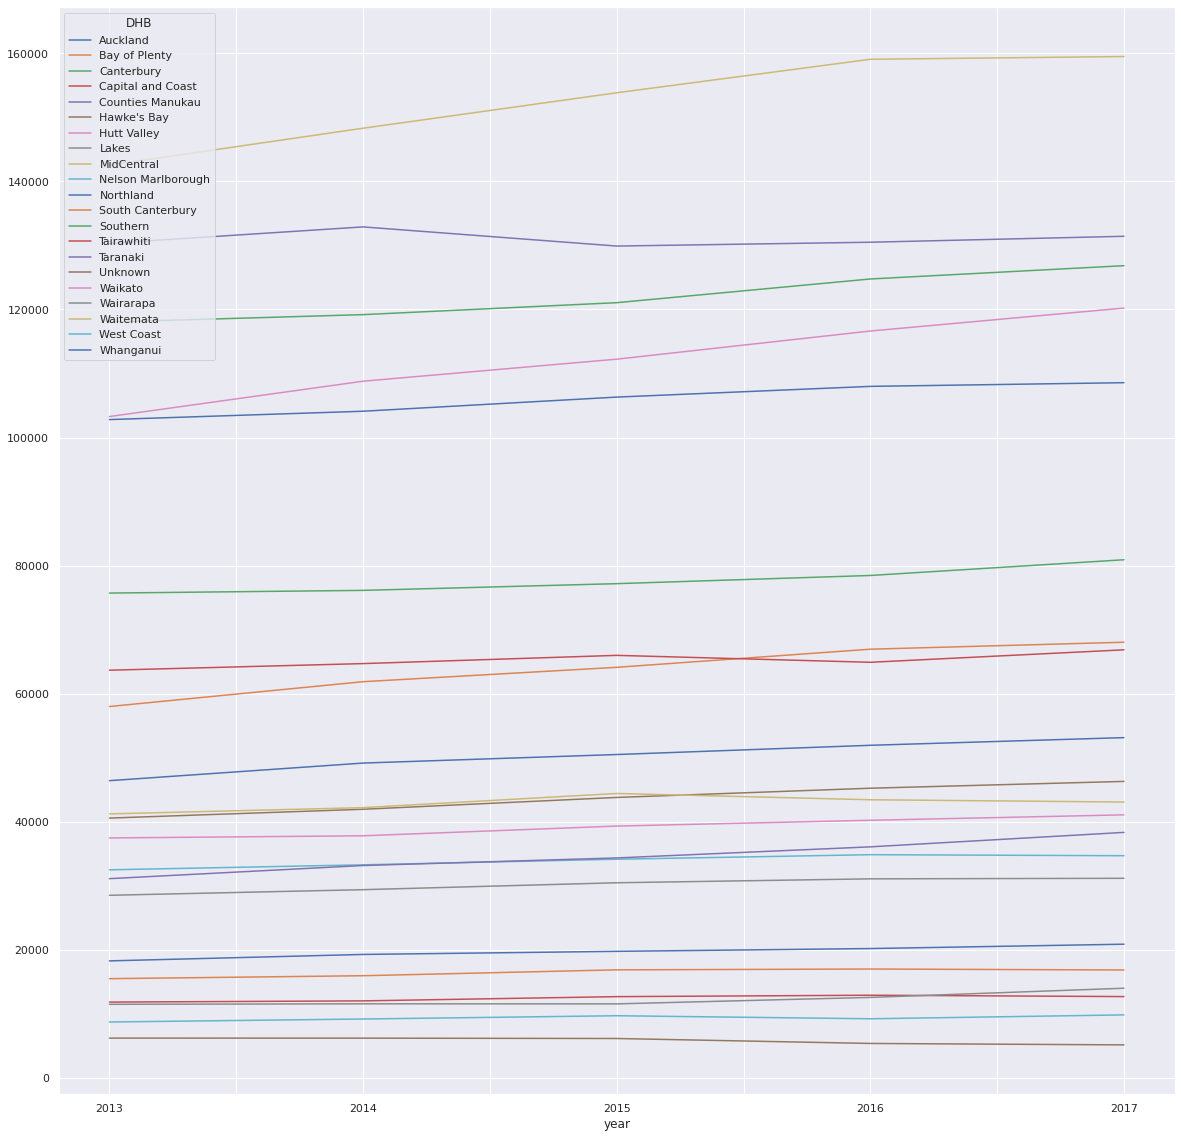

In [29]:
discharges_by_year_and_DHB.T.plot()

In [30]:
discharges_by_year_and_DHB.columns = discharges_by_year_and_DHB.columns.map(lambda c: f"Discharges_{c}")
discharges_by_year_and_DHB

year,Discharges_2013,Discharges_2014,Discharges_2015,Discharges_2016,Discharges_2017
DHB,,,,,
Auckland,102802,104105,106314,107989,108564
Bay of Plenty,57981,61857,64102,66935,68021
Canterbury,118038,119195,121063,124765,126842
Capital and Coast,63652,64684,65970,64888,66836
Counties Manukau,130337,132900,129908,130505,131435
Hawke's Bay,40552,41929,43775,45218,46282
Hutt Valley,37451,37785,39304,40212,41056
Lakes,28491,29369,30449,31060,31145
MidCentral,41207,42184,44395,43415,43058


In [31]:
DHB = DHB.merge(discharges_by_year_and_DHB, left_on="DHB2015_Name", right_index=True, how="left")
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,touched_TALBs,pop_1996,pop_2001,pop_2006,pop_2013,pop_2018,...,pop_2028,pop_2033,pop_2038,pop_2043,pop_2048,Discharges_2013,Discharges_2014,Discharges_2015,Discharges_2016,Discharges_2017
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",140700,144350,152550,164800,185700,...,207700,215100,221300,226800,231300,46397,49145,50480,51923,53121
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",381900,418500,471800,517800,576600,...,663000,701900,739200,775100,809400,142553,148314,153853,159083,159515
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",377310,406560,447690,481280,515720,...,579130,616070,651950,686180,718400,102802,104105,106314,107989,108564
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",356600,393200,453500,494100,562300,...,649700,683800,716000,746400,774900,130337,132900,129908,130505,131435
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",341210,347570,370440,398780,446180,...,502980,524820,544490,562780,579220,103275,108796,112237,116634,120225
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",98200,99400,101500,103200,113400,...,122700,125000,126700,127800,128600,28491,29369,30449,31060,31145
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",167440,183380,200750,214930,249630,...,284850,296220,306270,315410,323630,57981,61857,64102,66935,68021
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,47200,45500,45900,47000,49500,...,53100,54000,54600,55000,55200,11810,11998,12660,12883,12668
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",109250,105910,107420,113810,121310,...,130350,133200,135350,137150,138400,31090,33141,34326,36058,38316
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",146550,147260,151970,157850,172270,...,187400,192300,196190,199530,201960,40552,41929,43775,45218,46282


In [32]:
DHB.columns

Index(['DHB2015_Code', 'DHB2015_Name', 'Shape_Length', 'geometry',
       'touched_TALBs', 'pop_1996', 'pop_2001', 'pop_2006', 'pop_2013',
       'pop_2018', 'pop_2023', 'pop_2028', 'pop_2033', 'pop_2038', 'pop_2043',
       'pop_2048', 'Discharges_2013', 'Discharges_2014', 'Discharges_2015',
       'Discharges_2016', 'Discharges_2017'],
      dtype='object')

In [33]:
DHB.Discharges_2017.sum()

1224122

In [34]:
DHB.Discharges_2017/DHB.pop_2018

0     0.286058
1     0.276648
2     0.210510
3     0.233745
4     0.269454
5     0.274647
6     0.272487
7     0.255919
8     0.315852
9     0.268660
10    0.334972
11    0.189224
12    0.266597
13    0.247449
14    0.298526
15    0.223121
16    0.302467
17    0.226221
18    0.276636
19    0.239754
dtype: float64

In [35]:
DHB.drop(columns="geometry").to_csv("output/DHBs.csv", index=False)